#### Ashit Debdas

##### Challenge 1: Breast Cancer Dataset EDA

##### Importing Libraries

In [44]:
import statistics
import numpy as np
import pandas as pd
from statistics import stdev
import scipy.stats as stats
import statsmodels.api as sm

#Visualization
import seaborn as sns
sns.set_theme()
sns.set_palette(palette = "rainbow")
from matplotlib import pyplot as plt
%matplotlib inline

#sklearn
from sklearn.svm import SVC
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score

##### Prepare Environment

Read the csv file

In [45]:
df = pd.read_csv('wdbc.data')
print(f"Shape of the sample dataset:{df.shape}")

Shape of the sample dataset:(568, 32)


Identified the column names as per dataset description

In [46]:
columns = ["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean",
"concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se","texture_se", "perimeter_se",
"area_se", "smoothness_se", "compactness_se", "concavity_se", "concave_points_se", "symmetry_se"," fractal_dimension_se",
"radius_worst", "texture_worst", "perimeter_worst",	"area_worst", "smoothness_worst",  "compactness_worst",	
"concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"] 

Adding the column names as per dataset description

In [47]:
df.columns = columns
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       ' fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [48]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


##### 1. What are the mean, median and standard deviation of the “perimeter” feature?
+ As per the dataset we have three features as a perimeter, Since question is not specified which one, so we have to calculate the mean, median and standard deviation of the each feature.
+ Mean of perimeter_mean, perimeter_se and perimeter_worst features is as follows:

In [49]:
perimeter_mean = round(df["perimeter_mean"].mean(),3)
print(f"The mean of perimeter_mean feature is {perimeter_mean}")
perimeter_se_mean = round(df["perimeter_se"].mean(),3)
print(f"The mean of perimeter_se feature is {perimeter_se_mean}")
perimeter_worst_mean = round(df["perimeter_worst"].mean(),3)
print(f"The mean of perimeter_worst feature is {perimeter_worst_mean}")

The mean of perimeter_mean feature is 91.915
The mean of perimeter_se feature is 2.856
The mean of perimeter_worst feature is 107.125


+ Median of perimeter_mean, perimeter_se and perimeter_worst features as follows:

In [50]:
perimeter_median = round(df["perimeter_mean"].median(),3)
print(f"The median of perimeter_mean feature is {perimeter_median}")
perimeter_se_median = round(df["perimeter_se"].median(),3)
print(f"The median of perimeter_se feature is {perimeter_se_median}")
perimeter_worst_median = round(df["perimeter_worst"].median(),3)
print(f"The median of perimeter_worst feature is {perimeter_worst_median}")

The median of perimeter_mean feature is 86.21
The median of perimeter_se feature is 2.285
The median of perimeter_worst feature is 97.655


+ standard deviation of perimeter_mean, perimeter_se and perimeter_worst features is as follows:

In [51]:
perimeter_std = round(stdev(df["perimeter_mean"]),3)
print(f"The standard deviation of perimeter_mean feature is {perimeter_std}")
perimeter_se_std = round(stdev(df["perimeter_se"]),3)
print(f"The standard deviation of perimeter_se feature is {perimeter_se_std}")
perimeter_worst_std = round(stdev(df["perimeter_worst"]),3)
print(f"The standard deviation of perimeter_worst feature is {perimeter_worst_std}")

The standard deviation of perimeter_mean feature is 24.286
The standard deviation of perimeter_se feature is 2.009
The standard deviation of perimeter_worst feature is 33.475


##### 2. Is the first feature in this data set (the “radius”) normally distributed? Quantify your answer. If not, what might be a more appropriate statistical distribution for modelling purposes?
+ Taken a subset of those features as radius_mean, radius_se, radius_worst to justify the answer.

In [52]:
radius = df[["radius_mean", "radius_se", "radius_worst"]]

"""
Skew function of Pandas
"""
old_skew = radius.skew().sort_values(ascending=False)
old_skew

radius_se       3.122749
radius_worst    1.110671
radius_mean     0.948035
dtype: float64

+ Histogram and QQ Plot

+ Positive value means the distribution is skewed to the right.
+ Negative value means the distribution is skewed to the left.
+ 0 means perfect normal distribution. The bell shaped curve.

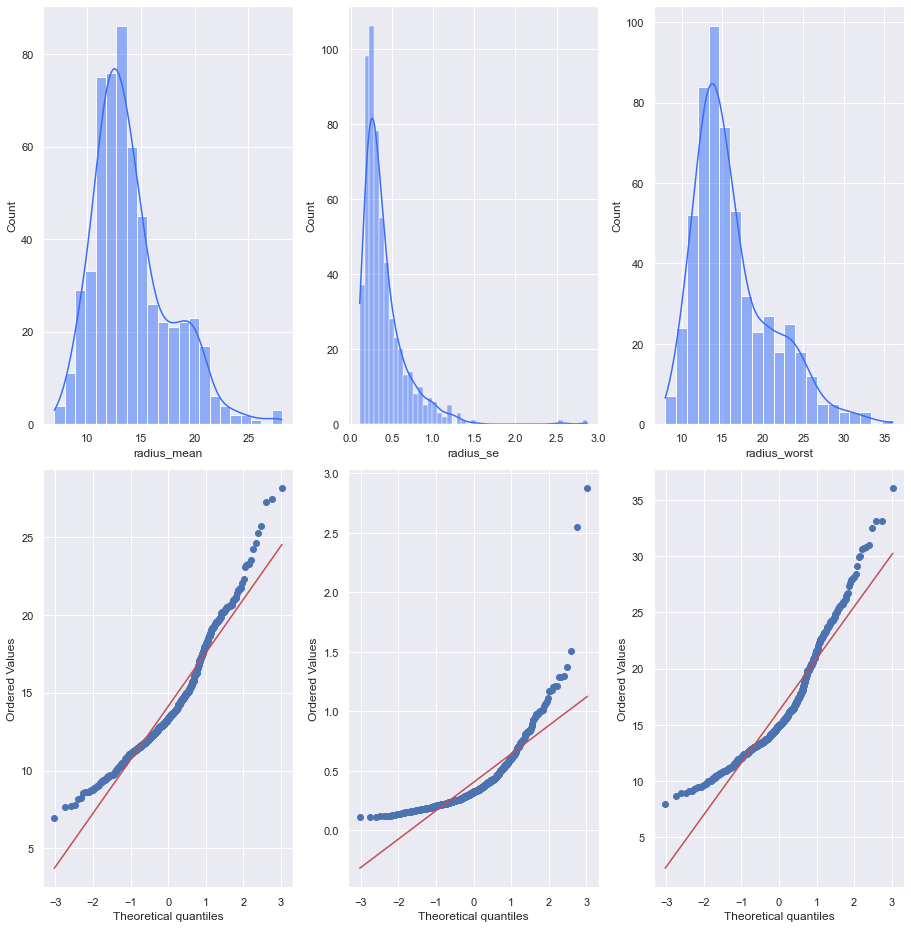

In [53]:
"""
plot histogram of redius_mean, radius_se, radius_worst features
"""
plt.figure(figsize=(17,13))
for i in list(enumerate(radius.columns)):
    plt.subplot(2, 4, i[0]+1)
    sns.histplot(data = radius[i[1]], kde=True)  # Histogram with KDE line
    
    
"""
plot QQ Plotistogram of redius_mean, radius_se, radius_worst features
"""
for i in list(enumerate(radius.columns)):
    plt.subplot(2, 4,i[0]+5)
    stats.probplot(radius[i[1]], dist="norm", plot=plt)
    plt.title("")
plt.tight_layout()  
plt.show()

+ Boxplot

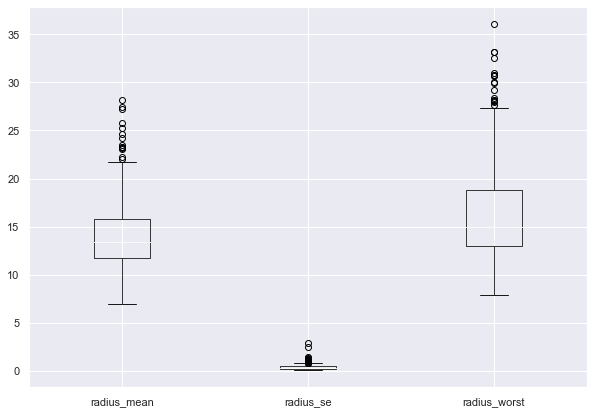

In [54]:
""""
plot boxplot of redius_mean, radius_se, radius_worst features
"""
radius.boxplot(figsize=(10,7))
plt.show()

##### Analysis

1. Here i can see radius_mean and radius_worst features are slightly skewed to the right and radius_se is highly right skewed. We have to find appropriate ways to handle these skewed data and try to turn them to as normally distributed as possible. But we will only do this if your algorithm performs better in a normally distributed data. Some algorithms do not need a normal distribution and in those cases, we can ignore. For example, Linear Regression, Logistic Regression, and K-means are very sensitive to the distribution of the data other hand Decision Trees and Random Forest are not.
2. Above Boxplot the box plot gives us a hint about the same also we clearly see all the features has a outliers.

##### We can handle skewed data using mathematical transformers. we have a lot of options to handle skewed data here is a few of them.
1. Logarithmic Transformation
2. Reciprocal transformation
3. Sqaure Root Tansformation
4. BoxCox Transformation

For Example: We can use Logarithmic Transformation to handle the skewed data.

In [55]:
"""
function to apply transformer and check the distribution with histogram and kdeplot
"""
def logTrans(feature): 
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    df_log = pd.DataFrame(logTr.fit_transform(df))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_log,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_log.skew()[0],2)} after Log transformation.")

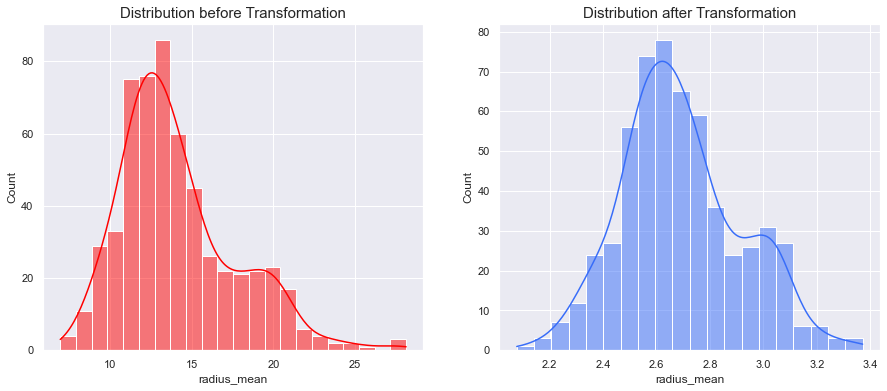

Skewness was 0.95 before & is 0.35 after Log transformation.


In [56]:
radius_mean = logTrans(feature="radius_mean")

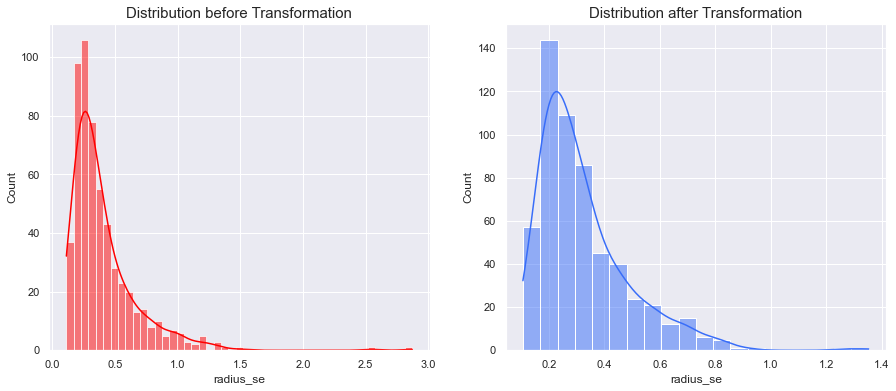

Skewness was 3.12 before & is 1.73 after Log transformation.


In [57]:
radius_se = logTrans(feature="radius_se")

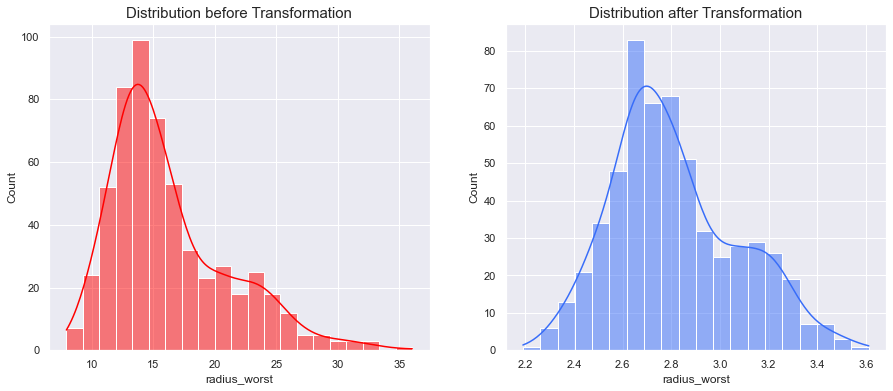

Skewness was 1.11 before & is 0.51 after Log transformation.


In [58]:
radius_worst = logTrans(feature="radius_worst")

##### 3. Train a classifier to predict the diagnosis of malignant or benign. Compare and discuss the results of two classifiers (e.g. SVM, logistic regression and/or decision tree) and make some suggestions on how the classifier’s performance could be further improved

##### Before answering this question we need to few basic analysis and preprocessing steps like
1. Checking any null value on the dataset
2. Checking the distribution of target variable
3. Converting categorical variables to numeric variables 
4. Droping the features are not useful to the model
5. Splitting the dataset into training and testing sets
6. Feature scaling
7. Finally we will few plots like feature importance, confusion matrix plot, AUC and ROC curve, precision recall plot etc.

In [59]:
# Identification of any null values within the dataset.
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
 fractal_dimension_se      0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [60]:
# checking the different values contained in the diagnosis column B = 357 and M = 221
df['diagnosis'].value_counts()

B    357
M    211
Name: diagnosis, dtype: int64

+ Here, B referes to benign which means the cells are safe from cancer whereas M refers to Malign which means the cell is very much dangerous and venomous can lead to breast cancer

+ We have to train the data in such a way that it can predict the status of the cells that whether they are M(malign) or B(Benign).

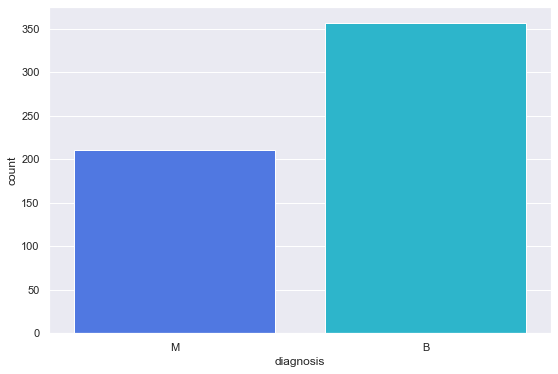

In [61]:
# Display the frequency distribution for cancer type
plt.figure(figsize=(9,6))
ax = sns.countplot(x='diagnosis', data=df)
plt.show()

+ This plot shpws the target variable is slightly imbalance.


##### Preprocessing the target variable since its a catagorical variable

In [62]:
## # Label Encoding identifyed columns B = 357 and M = 221

feature_label = ["diagnosis"]
def label_encoding(features, df):
    for i in features:
        df[i] = df[i].map({'B': 1, 'M': 0})
    return
label_encoding(["diagnosis"], df)
df["diagnosis"].value_counts()

1    357
0    211
Name: diagnosis, dtype: int64

In [63]:
# dropping the id column
df = df.drop(["id"], axis=1)

Train-Test-Split

In [64]:
# split the data into train and test
x = df.iloc[:,1:]
y = df.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
print(f'Independent variables {x.shape}')
print(f'Dependent variables {y.shape}')
print(f'Independent variables of training set {x_train.shape}')
print(f'Independent variables of test set {x_test.shape}')
print(f'Dependent variables of training set {y_train.shape}')
print(f'Dependent variables of test set {y_test.shape}')


Independent variables (568, 30)
Dependent variables (568,)
Independent variables of training set (454, 30)
Independent variables of test set (114, 30)
Dependent variables of training set (454,)
Dependent variables of test set (114,)


In [65]:
# standard scaling 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

##### Model Evaluation Metrics
+ Feature Weight Plots

In [66]:
"""
define a function that plots the feature weights for a classifier
"""

def feature_weight(x_df, classifier, classifier_name):
    weight = pd.Series(classifier.coef_[0] , index=x_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weight[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind='bar')

    bottom_weights_selected = weight[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name}-Bottom 10 Feature Weights')
    bottom_weights_selected.plot(kind='bar')
    
    return print('')

+ Confusion Matrix Plot

In [67]:
""""
Define a function that plots the confusion matrix for a classifier and the train and test accuracy.
"""

def confusion_matrix_plot(x_train, y_train, x_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7,6))
    plot_confusion_matrix(classifier, x_test, y_test, display_labels=['M', 'B'], cmap=plt.cm.Blues, normalize=None, ax=ax)
    ax.set_title(f'{classifier_name}-Confusion Matrix')
    plt.show()

    fig, ax = plt.subplots(figsize=(7,6))
    plot_confusion_matrix(classifier, x_test, y_test, display_labels=['M', 'B'], cmap=plt.cm.Blues, normalize="true", ax=ax)
    ax.set_title(f'{classifier_name}-Confusion Matrix (norm.)')
    plt.show()

    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy score Train: {classifier.score(x_train, y_train)} (as comarison)')
    
    return print('')

+ ROC Curve AUC Curve Plot

In [68]:
"""
define a function that plots the roc curve and the auc score.
"""

def roc_curve_auc_curve(x_test, y_train, y_pred_probabilities, classifier_name):
    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(f'{classifier_name} - ROC Curve')
    plt.show()

    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')

+ Precision And Recall Plot

In [69]:
"""
define a function that plots the ROC curve, f1 score, precision and recall score
"""

def precision_recall_curve_score(x_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholes = precision_recall_curve(y_test, y_pred_prob)

    plt.plot(recall, precision, label = f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name}-Precision Recall Curve')
    plt.show()

    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)
   
    return print(f'F1 Score: {f1_score_result} \n AUC Score: {auc_score_result}\n')

1 .Logistic Regression

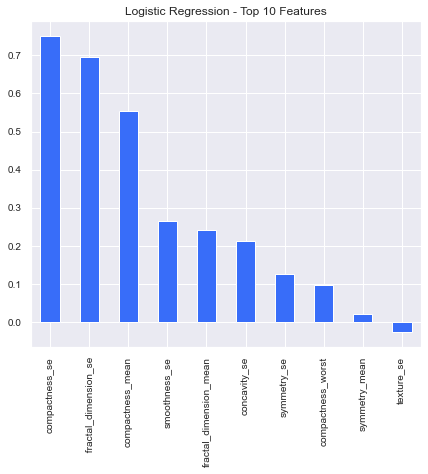

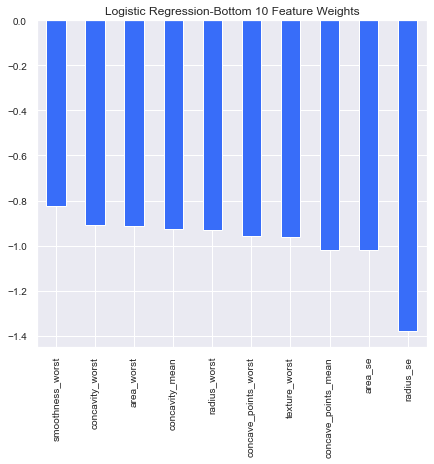

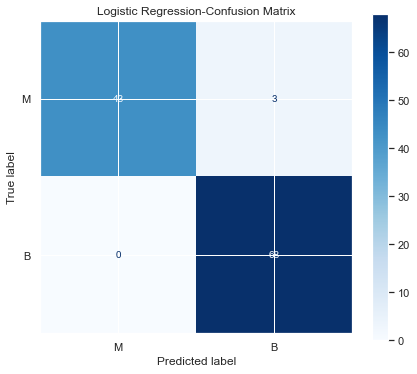

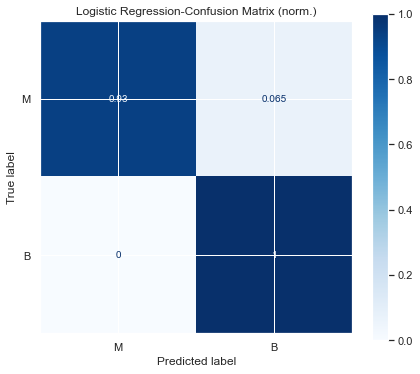

Accuracy Score Test: 0.9736842105263158
Accuracy score Train: 0.9889867841409692 (as comarison)



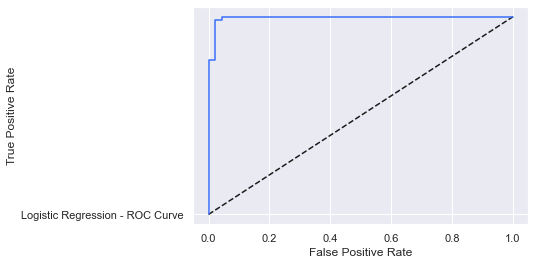

AUC Score (ROC): 0.9948849104859335



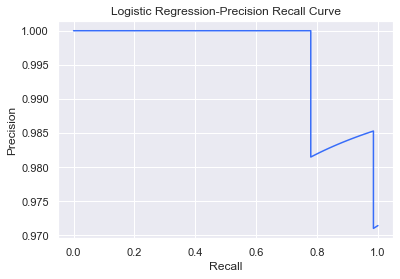

F1 Score: 0.9784172661870503 
 AUC Score: 0.9961865782062262



In [70]:
#fil the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)

# make  predictions on the test set
y_pred_logreg = log_reg.predict(x_test)
y_pred_prob_logreg = log_reg.predict_proba(x_test)

# plot model evelution
feature_weight(x, log_reg, 'Logistic Regression')
confusion_matrix_plot(x_train, y_train, x_test, y_test,
                      log_reg, y_pred_logreg, 'Logistic Regression')
roc_curve_auc_curve(x_test, y_train, y_pred_prob_logreg, 'Logistic Regression')
precision_recall_curve_score(
    x_test, y_test, y_pred_logreg, y_pred_prob_logreg, 'Logistic Regression')

2. Random Forest Classifier

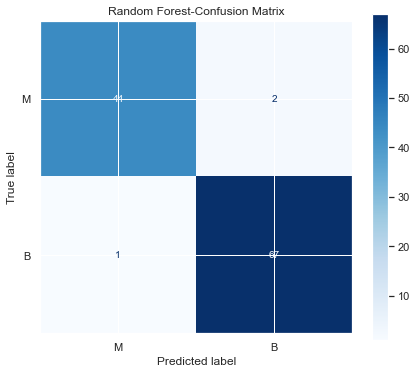

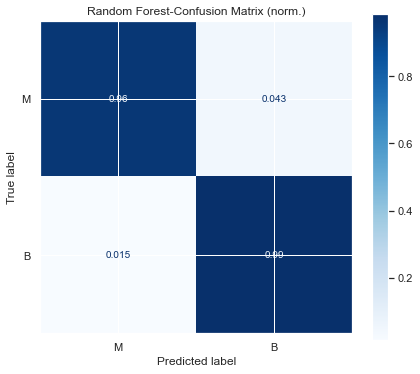

Accuracy Score Test: 0.9736842105263158
Accuracy score Train: 1.0 (as comarison)



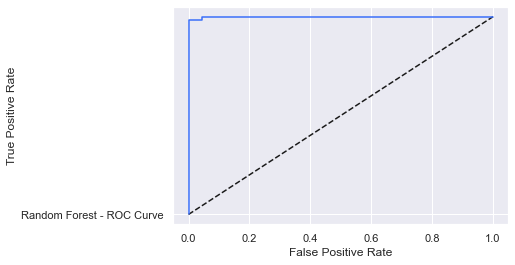

AUC Score (ROC): 0.9993606138107417



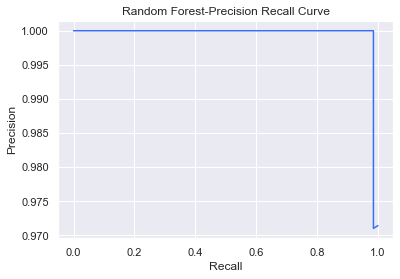

F1 Score: 0.9781021897810219 
 AUC Score: 0.9995767872366337



In [71]:
#fil the model
rforest = RandomForestClassifier()
rforest.fit(x_train, y_train)

## make predictions on the test set
y_pred_rforest = rforest.predict(x_test)
y_pred_prob_rforest = rforest.predict_proba(x_test)

##plot model evelution
confusion_matrix_plot(x_train, y_train, x_test, y_test, rforest, y_pred_rforest, 'Random Forest')
roc_curve_auc_curve(x_test, y_train, y_pred_prob_rforest, 'Random Forest')
precision_recall_curve_score(x_test, y_test, y_pred_rforest, y_pred_prob_rforest, 'Random Forest')

3. Support Vector Machine

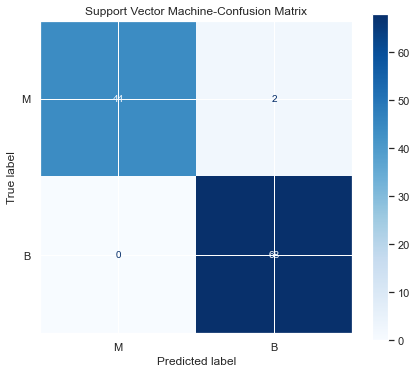

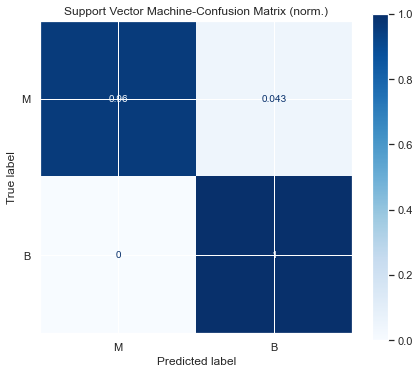

Accuracy Score Test: 0.9824561403508771
Accuracy score Train: 0.986784140969163 (as comarison)



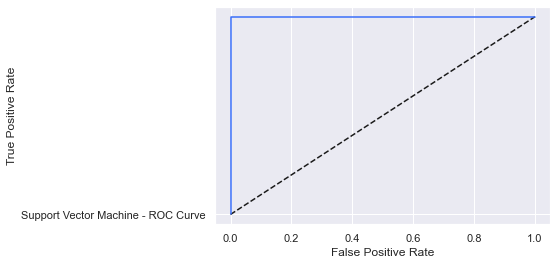

AUC Score (ROC): 1.0



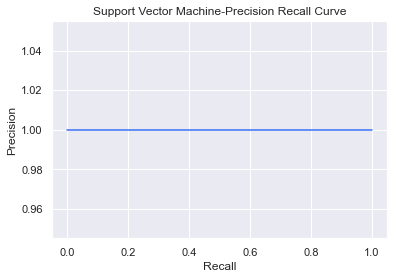

F1 Score: 0.9855072463768115 
 AUC Score: 0.9999999999999998



In [72]:
#fil the model
suport_vector_machine = SVC(kernel= 'rbf', probability=True)
suport_vector_machine.fit(x_train, y_train)

#make predictions on the test set
y_pred_svm = suport_vector_machine.predict(x_test)
y_pred_prob_svm = suport_vector_machine.predict_proba(x_test)

#plot model evelution
confusion_matrix_plot(x_train, y_train, x_test, y_test, suport_vector_machine, y_pred_svm, 'Support Vector Machine')
roc_curve_auc_curve(x_test, y_train, y_pred_prob_svm, 'Support Vector Machine')
precision_recall_curve_score(x_test, y_test, y_pred_svm, y_pred_prob_svm, 'Support Vector Machine')

##### summary of the model:
1. Looking at model results, the best accuracy on the test set is achieved by the random forest with 1. Given the slightly imbalance of the data towards M = malignant, it makes sense to compare F1 scores to get the model with the best score on jointly precision and recall. This would also be the random forest with a F1 score of 1 and TP = 67, TN = 44, FP = 2, FN = 1. 
2. Usually both the class are equally important for any business outcome, but in this case M is more important than B. M refers to the malign which means the cell is very much dangerous and venomous can lead to breast cancer. Therefore, we need to take care FP.
3. Overall the model is doing well and the best model is the random forest with a F1 score of 1.

##### Area of concerned and improvement:
1. Since the model is doing well, i cant see any scope to do hyperparameter tune at this point.
2. After seeing the model performance on the test dataset, i am afraid that might lead to overfitting. because of the small sample dataset.hence we need more data to do more deep analysis.

##### Challenge 2: Spearman’s Footrule Distance

+ While working on this challenge I found that, Footrule distance is an absolute distance metric. It is used to compare the distances between two rank vector. most of the paper and articles says about how to use mathematically to compare the distances between two rank vector. i have have not found such any clue how we can use three dimensional matrix to compare the distances between two rank vector. also i found that spearman’s footrule distance is similar to the manhattan distance.
for calculating the distance we need two point, but we have three points.

In [73]:
"""
Calculate the sum of Spearman’s Footrule Distances for a given proposed_ranking.
"""
scores = {"A": [100, 0.1, 1.0], "B": [0, 0.3, 0.2], "C": [-100, 0.2, 0.3]}
ranking = ["A", "B", "C"]

"""
Computes the Spearman footrule distance between two full lists of ranks:
        F(s,t) = sum[ |s(i) - t(i)| ]/S
the normalized sum over all elements in a set of the absolute difference between the rank
"""

def sum_spearman_distances(scores, ranking):
    sum = 0
    for i in range(len(ranking)):
        for j in range(len(ranking)):
            sum += abs(scores[ranking[i]][j] - scores[ranking[j]][i])
    return sum

sum_spearman_distances(scores, ranking)

202.2

Thoughts:
+ As i got to now while working on this challenge, footrule distance is an absolute distance between two vector. most of the paper and articles says about how to use mathematically to compare the distances between two rank vector. i have have not found such any clue how we can use three dimensional matrix to compare the distances between two rank vector. also i found that spearman’s footrule distance is similar to the manhattan distance.

Challenges:
+ Calculating the distance we need two point, but we have three points.

Reference Links:

http://mlwiki.org/index.php/Rank_Correlation#Spearman.27s_Footrule

https://www.lcg.ufrj.br/python/ADs/AD1_2018-2.EN.pdf

https://www.geeksforgeeks.org/sum-manhattan-distances-pairs-points/

https://people.revoledu.com/kardi/tutorial/Similarity/FootruleDistance.html

Other experiments for this challenge:

In [75]:
s = [100, 0.1, 1.0]
# t =  [0, 0.3, 0.2]
t =  [-100, 0.2, 0.3]

from numpy import asarray

def spearman_footrule_distance(s,t):
    """
    Computes the Spearman footrule distance between two full lists of ranks:
        F(s,t) = sum[ |s(i) - t(i)| ]/S,
    the normalized sum over all elements in a set of the absolute difference between
    the rank according to s and t.  As defined, 0 <= F(s,t) <= 1.
    S is a normalizer which is equal to 0.5*len(s)^2 for even length ranklists and
    0.5*(len(s)^2 - 1) for odd length ranklists.
    If s,t are *not* full, this function should not be used. s,t should be array-like
    (lists are OK).
    """
    # check that size of intersection = size of s,t?
    assert len(s) == len(t)
    sdist = sum(abs(asarray(s) - asarray(t)))
    print(sdist)
    # c will be 1 for odd length lists and 0 for even ones
    c = len(s) % 2
    normalizer = 0.5*(len(s)**2 - c)
    return sdist/normalizer

spearman_footrule_distance(s,t)